# Clustering & Customer Segmentation

The objective of this project is to analyze customer behavioral data and segment them into distinct groups using clustering techniques. By applying machine learning algorithms like K-Means, Hierarchical Clustering, and RFM Analysis.

There is a record of 1000 customers.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import warnings
warnings.filterwarnings('ignore')

In [37]:
cust_data = pd.read_csv('/content/customer_segmentation_data.csv')
cust_data.head(10)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
5,6,31,Other,57305,24,3,30,Home & Garden,86.85
6,7,19,Other,54319,68,5,43,Clothing,191.72
7,8,43,Male,108115,94,9,27,Groceries,734.56
8,9,53,Male,34424,29,6,7,Sports,951.71
9,10,55,Female,45839,55,7,2,Electronics,821.18


In [38]:
cust_data.shape

(1000, 9)

There are 1000 records and 9 columns in dataset.

In [39]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


There are no null values in the data.

###Exploratory Data Analysis

####Univariate Analysis

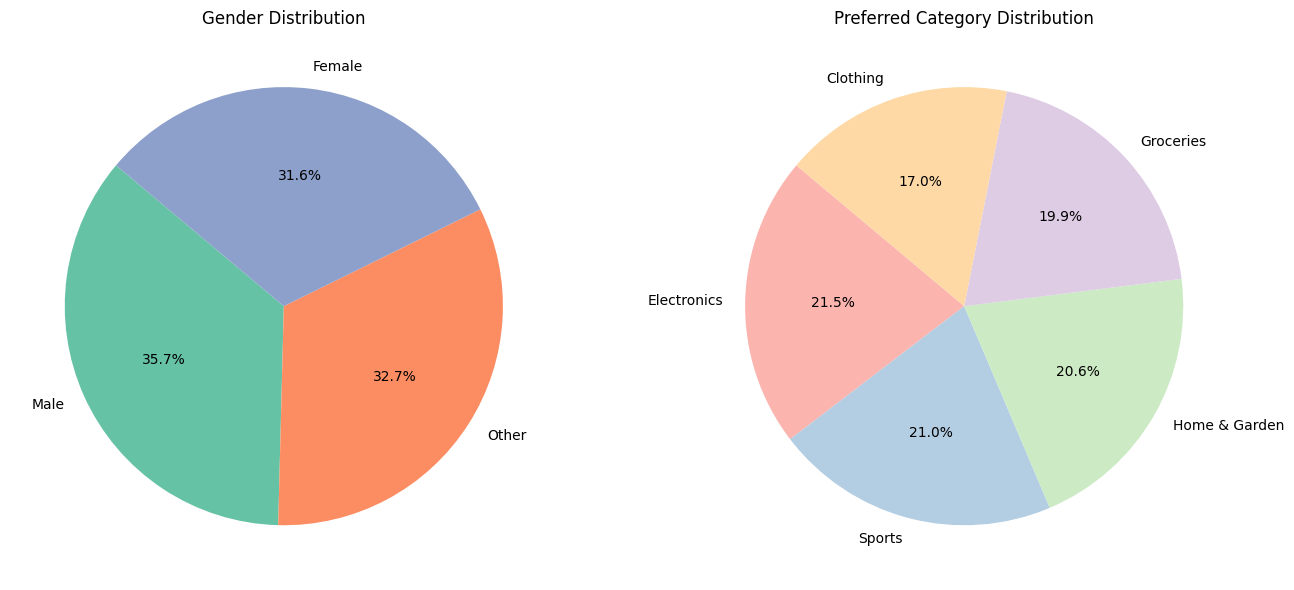

In [40]:
#Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gender
gender_counts = cust_data['gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[0].set_title('Gender Distribution')

# Preferred Category
category_counts = cust_data['preferred_category'].value_counts()
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
axes[1].set_title('Preferred Category Distribution')

plt.tight_layout()
plt.show()

- The above pie chart for gender shows almost same distribution for each gender.
- Similar with the preferred category have approx same distribution among each category.

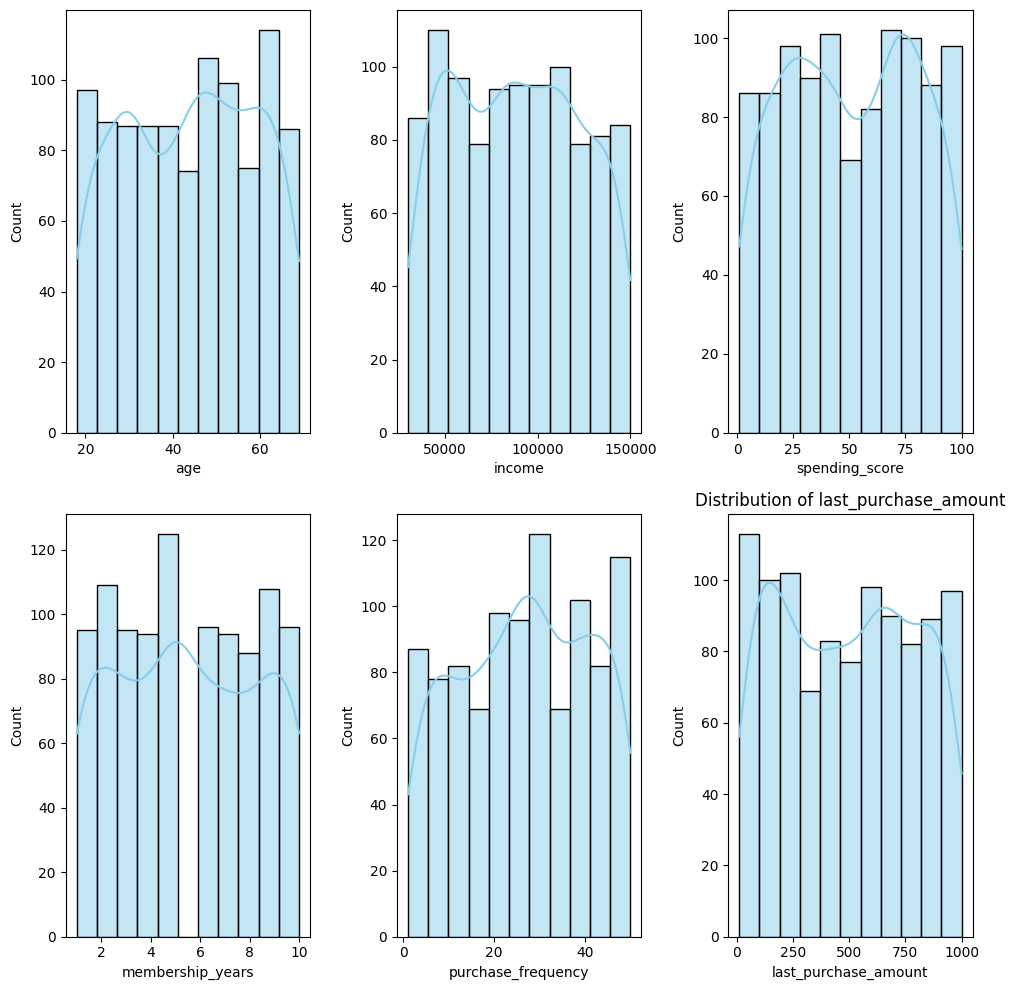

In [41]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes = axes.flatten()

numeric_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

for i, col in enumerate(numeric_cols):
    sns.histplot(cust_data[col], kde=True, ax=axes[i], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


The above graph interprets:
- Age is uniformly distributed across the range of 20 to 65. Slight peaks around 30–35 and 60–65, suggesting small clusters of younger and older shoppers.
- Income ranges from 30,000 to 150,000. Peaks around 50,000–60,000 and 100,000–120,000 suggest two income segments — possibly mid-income and upper-income groups.
- Spending Score is uniform distribution between 0 and 100. A moderate peak near 75–80, indicating many customers have high spending tendencies.
- Membership Years show most customers have between 2 and 7 years of membership. Slight peaks at 3, 6, and 9 years.
- Purchase Frequency broadly distributed across the range 0 to 50 purchases. Peaks at around 10–15, 25, and 35–40, showing different engagement levels among customers.
- Last Purchase Amount are spread from ₹0 to ₹1000. Peaks around ₹200–300, ₹450–500, and ₹850–950, suggesting three tiers of spending behavior: low, mid, and premium.

####Bivariate Analysis

Text(0.5, 1.0, 'Income Distribution by Gender')

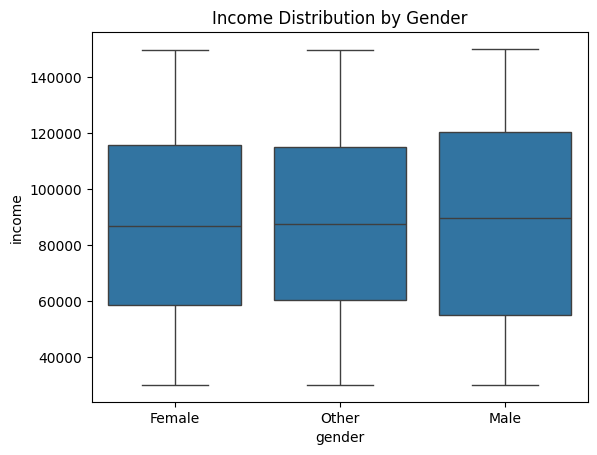

In [42]:
# Income vs Gender
sns.boxplot(data=cust_data, x='gender', y='income')
plt.title('Income Distribution by Gender')

The above graph shows male have higher income as compared to female and others.

Text(0.5, 1.0, 'Avg Purchase Frequency by Gender and Category')

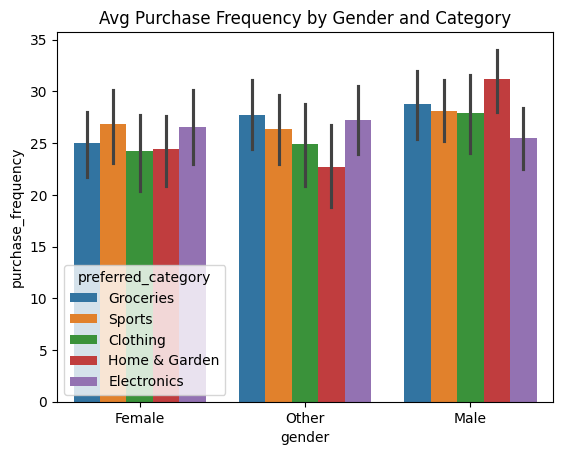

In [43]:
# Avg purchase frequency by gender & category
sns.barplot(data=cust_data, x='gender', y='purchase_frequency', hue='preferred_category')
plt.title('Avg Purchase Frequency by Gender and Category')

The above graph shows that females purchase electronics and sports mostly. Males have the highest purchase frequency in the Home and Garden and Groceries categories. Others have frequent purchases in electronics and groceries.

Text(0.5, 1.0, 'Spending Score by Gender')

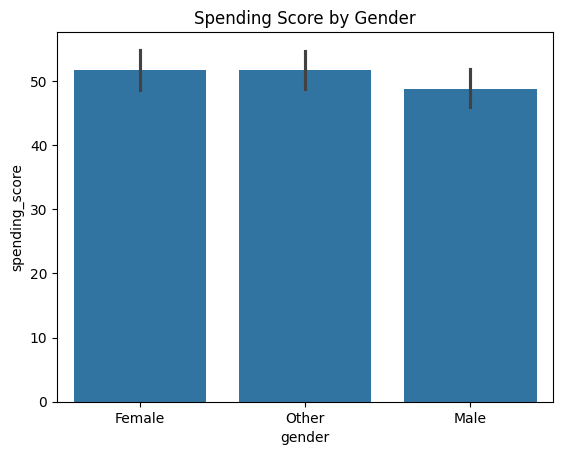

In [44]:
# Spending score by gender
sns.barplot(data=cust_data, x='gender', y='spending_score')
plt.title('Spending Score by Gender')

The above graph shows that females and others have the highest spending score compared to males.

In [45]:
# Group last purchase amount and purchase frequency by Membership years
avg_purchase = cust_data.groupby('membership_years')[['last_purchase_amount', 'purchase_frequency']].mean().reset_index()

<Axes: xlabel='membership_years', ylabel='last_purchase_amount'>

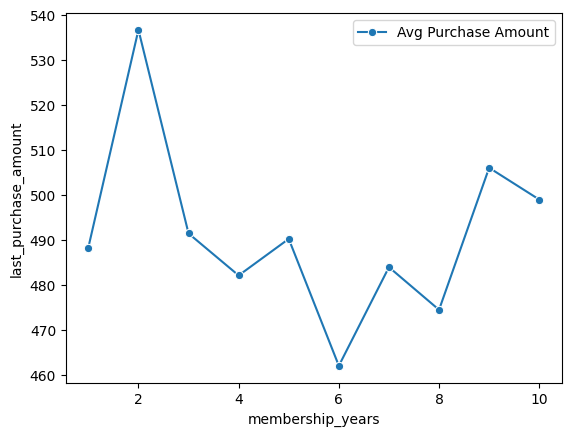

In [46]:
# Last purchase amount by Membership years
sns.lineplot(data=avg_purchase, x='membership_years', y='last_purchase_amount', label='Avg Purchase Amount', marker='o')

As we can see in the above graph, the purchase amount is higher in the 2 years of membership and lower in the 6 years.

<Axes: xlabel='membership_years', ylabel='purchase_frequency'>

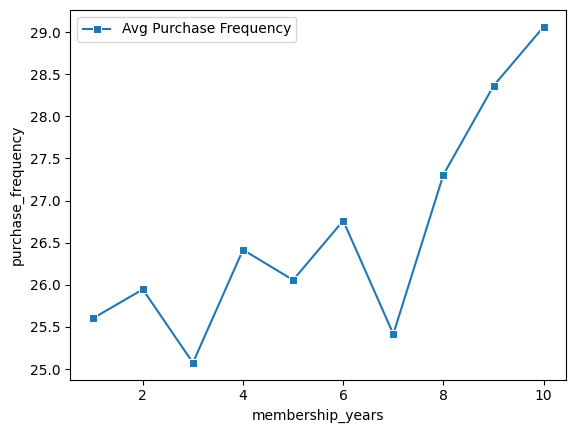

In [47]:
# Purchase frequency by Membership years
sns.lineplot(data=avg_purchase, x='membership_years', y='purchase_frequency', label='Avg Purchase Frequency', marker='s')

The above graph shows that purchase frequency increases as the membership year rises.

In [48]:
cust_data.drop('id', axis=1, inplace=True)

####Encoding categorical columns

In [49]:
cust_encoded = cust_data.copy()
le_gender = LabelEncoder()
le_category = LabelEncoder()
cust_encoded['gender'] = le_gender.fit_transform(cust_encoded['gender'])
cust_encoded['preferred_category'] = le_category.fit_transform(cust_encoded['preferred_category'])

In [50]:
cust_encoded.head(5)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,0,99342,90,3,24,2,113.53
1,21,0,78852,60,2,42,4,41.93
2,60,0,126573,30,2,28,0,424.36
3,40,2,47099,74,9,5,3,991.93
4,65,0,140621,21,3,25,1,347.08


####Correlation Matrix

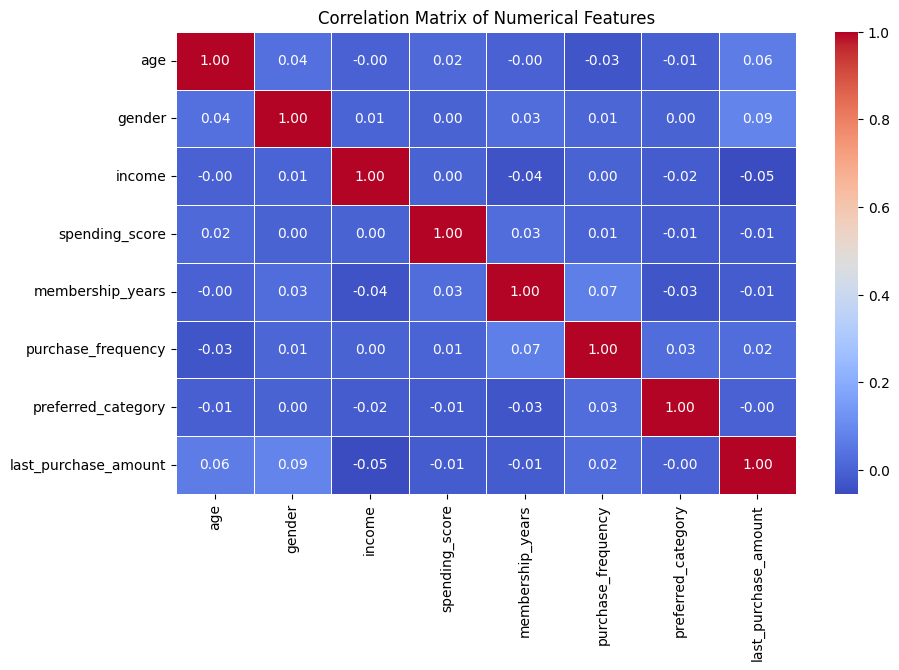

In [51]:
correlation_matrix = cust_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The above correlation matrix show no strong correlations between any pair, indicating low multicollinearity.

####Standardization

In [52]:
scaler = StandardScaler()
cust_scaled = scaler.fit_transform(cust_encoded)

In [53]:
cust_scaled

array([[-0.38464377, -1.2609171 ,  0.31686767, ..., -0.18234781,
        -0.0510282 , -1.28154045],
       [-1.51536211, -1.2609171 , -0.28201608, ...,  1.08200524,
         1.38638595, -1.52376266],
       [ 1.07863878, -1.2609171 ,  1.11277804, ...,  0.09861954,
        -1.48844236, -0.23000511],
       ...,
       [-1.38233643, -0.01371918,  0.71890017, ...,  1.08200524,
         1.38638595, -1.41158265],
       [-1.44884927, -1.2609171 ,  0.73637858, ...,  1.22248891,
        -0.76973528,  0.04334062],
       [-0.51766946, -1.2609171 ,  0.05609457, ...,  0.30934505,
        -0.0510282 ,  0.59848958]])

##K-Means Clustering

####Elbow method
To check optimal number of clusters.

In [54]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=200)
    kmeans.fit(cust_scaled)
    wcss.append(kmeans.inertia_)

wcss

[8000.000000000004,
 7195.881393056811,
 6711.609182912002,
 6324.081879026728,
 5995.9601407859645,
 5701.156034872316,
 5511.997742493196,
 5373.615471625279,
 5204.068567413817,
 5012.481794292014,
 4873.76827703794,
 4772.029090237208,
 4582.1949221178875,
 4498.027682434519]

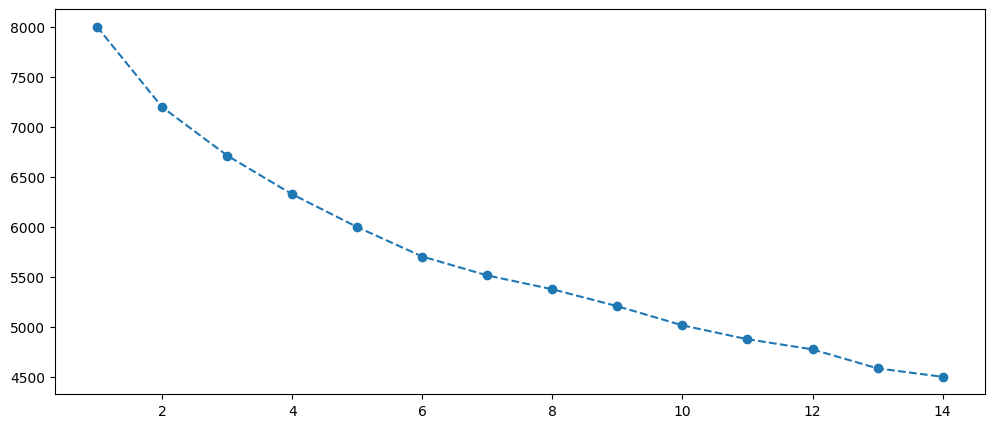

In [55]:
# plotting the elbow graph
plt.figure(figsize=(12,5))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')

The above elbow graph shows that the optimal number of clusters is usually at the "elbow point" — the value of k where the rate of WCSS reduction sharply decreases. In this graph, the elbow occurs at k = 4.

####Silhoutte Score

In [56]:
for cluster in range(2, 15):
 kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter = 200, n_init=10)
 kmeans.fit_predict(cust_scaled)

 score = silhouette_score(cust_scaled, kmeans.labels_, metric='euclidean')
 print(f'for cluster: {cluster} --> Silhouette Score: %.3f' % score)

for cluster: 2 --> Silhouette Score: 0.099
for cluster: 3 --> Silhouette Score: 0.090
for cluster: 4 --> Silhouette Score: 0.092
for cluster: 5 --> Silhouette Score: 0.094
for cluster: 6 --> Silhouette Score: 0.097
for cluster: 7 --> Silhouette Score: 0.100
for cluster: 8 --> Silhouette Score: 0.101
for cluster: 9 --> Silhouette Score: 0.101
for cluster: 10 --> Silhouette Score: 0.102
for cluster: 11 --> Silhouette Score: 0.105
for cluster: 12 --> Silhouette Score: 0.105
for cluster: 13 --> Silhouette Score: 0.107
for cluster: 14 --> Silhouette Score: 0.107


The silhouette scores are all low (< 0.2), which indicates that clusters are not well-separated.
The elbow method (k = 4)

####Train the K-Means with 4 clusters

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, max_iter=200)

In [58]:
y = kmeans.fit_predict(cust_scaled)
y

array([0, 0, 2, 1, 2, 1, 1, 3, 1, 0, 1, 1, 0, 1, 2, 3, 2, 0, 3, 2, 0, 3,
       2, 1, 0, 3, 1, 0, 0, 2, 1, 0, 3, 2, 1, 0, 2, 1, 0, 3, 2, 2, 0, 1,
       1, 2, 2, 0, 2, 2, 3, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 2, 2,
       0, 3, 2, 1, 0, 1, 0, 0, 3, 3, 1, 1, 2, 1, 3, 2, 0, 3, 2, 1, 1, 0,
       1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 2, 0, 0, 0, 3, 2, 1, 3, 1, 1, 3, 0,
       2, 1, 1, 0, 2, 3, 2, 1, 3, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1, 3,
       3, 0, 3, 3, 3, 2, 0, 0, 3, 0, 1, 0, 3, 1, 3, 0, 2, 3, 2, 0, 1, 1,
       2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 3, 0, 1, 2, 2, 3, 1, 0, 2,
       2, 2, 3, 2, 0, 3, 0, 3, 0, 3, 3, 2, 2, 1, 2, 3, 0, 1, 1, 3, 0, 3,
       0, 3, 3, 1, 2, 3, 3, 2, 1, 0, 2, 1, 0, 2, 3, 2, 2, 3, 0, 3, 1, 3,
       3, 1, 3, 0, 0, 0, 3, 1, 1, 0, 3, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2,
       2, 0, 2, 3, 1, 1, 3, 0, 3, 2, 2, 3, 3, 1, 2, 2, 0, 0, 3, 1, 1, 0,
       3, 1, 3, 2, 3, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 3, 2, 2, 2,
       2, 2, 3, 0, 0, 1, 1, 2, 3, 2, 2, 2, 1, 2, 0,

The clusters have been formed.

####Customer Segmentation

In [59]:
cust_data['Cust_Segment'] = y

In [60]:
cust_data.head(10)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Cust_Segment
0,38,Female,99342,90,3,24,Groceries,113.53,0
1,21,Female,78852,60,2,42,Sports,41.93,0
2,60,Female,126573,30,2,28,Clothing,424.36,2
3,40,Other,47099,74,9,5,Home & Garden,991.93,1
4,65,Female,140621,21,3,25,Electronics,347.08,2
5,31,Other,57305,24,3,30,Home & Garden,86.85,1
6,19,Other,54319,68,5,43,Clothing,191.72,1
7,43,Male,108115,94,9,27,Groceries,734.56,3
8,53,Male,34424,29,6,7,Sports,951.71,1
9,55,Female,45839,55,7,2,Electronics,821.18,0


####Customer Profile

In [61]:
customer_profile = cust_data.groupby('Cust_Segment').agg({
    'spending_score': 'mean',
    'age': 'mean',
    'income': 'mean',
    'spending_score': 'mean',
    'membership_years': 'mean',
    'purchase_frequency': 'mean',
    'last_purchase_amount': 'mean'
})

In [62]:
customer_profile

,spending_score,age,income,membership_years,purchase_frequency,last_purchase_amount
Cust_Segment,,,,,,
0,50.755814,39.267442,67717.155039,4.821705,22.236434,413.029961
1,47.693487,49.038314,60334.417625,6.183908,26.030651,637.872912
2,50.836000,45.328000,116729.668000,2.876000,25.384000,444.639840
3,53.822511,41.216450,112987.333333,8.190476,33.415584,468.147835


In [63]:
cust_data['Cust_Segment'].value_counts()

,count
Cust_Segment,
1,261
0,258
2,250
3,231


####Insights
The 4 clusters were formed by KMeans Clustering:
- Cluster 0 (258 customers) have mid-income, moderate spending score, relatively younger, medium tenure. Balanced customer group.
- Cluster 1	(261 customers)	lower income but high last purchase amount, older 50s, with longer membership. Likely loyal & committed customers.
- Cluster 2	(250 customers)	high income, customer average age upto 45, shorter tenure but decent frequency, high-potential spenders.
- Cluster 3	(231 customers)	higher spending score, highest purchase frequency, older customers, longest tenure. Most engaged and loyal segment.

##Hierarchical Clustering

In [64]:
for i in range(2, 20):
    hc = AgglomerativeClustering(n_clusters=i, metric = 'euclidean', linkage='complete')
    y1 = hc.fit_predict(cust_scaled)

    score = silhouette_score(cust_scaled, y1, metric='euclidean')
    print(f'for cluster: {i} --> Silhouetter Score: %.3f' % score)


for cluster: 2 --> Silhouetter Score: 0.047
for cluster: 3 --> Silhouetter Score: 0.030
for cluster: 4 --> Silhouetter Score: 0.012
for cluster: 5 --> Silhouetter Score: 0.012
for cluster: 6 --> Silhouetter Score: 0.011
for cluster: 7 --> Silhouetter Score: 0.015
for cluster: 8 --> Silhouetter Score: 0.023
for cluster: 9 --> Silhouetter Score: 0.031
for cluster: 10 --> Silhouetter Score: 0.032
for cluster: 11 --> Silhouetter Score: 0.031
for cluster: 12 --> Silhouetter Score: 0.029
for cluster: 13 --> Silhouetter Score: 0.034
for cluster: 14 --> Silhouetter Score: 0.035
for cluster: 15 --> Silhouetter Score: 0.037
for cluster: 16 --> Silhouetter Score: 0.034
for cluster: 17 --> Silhouetter Score: 0.036
for cluster: 18 --> Silhouetter Score: 0.036
for cluster: 19 --> Silhouetter Score: 0.037


The silhouette scores are all low (< 0.2), which indicates that clusters are not well-separated. K=2

In [65]:
# Hierarchical Clustering with 2 clusters
hc = AgglomerativeClustering(n_clusters=2, metric = 'euclidean', linkage='complete')
y_hc = hc.fit_predict(cust_scaled)

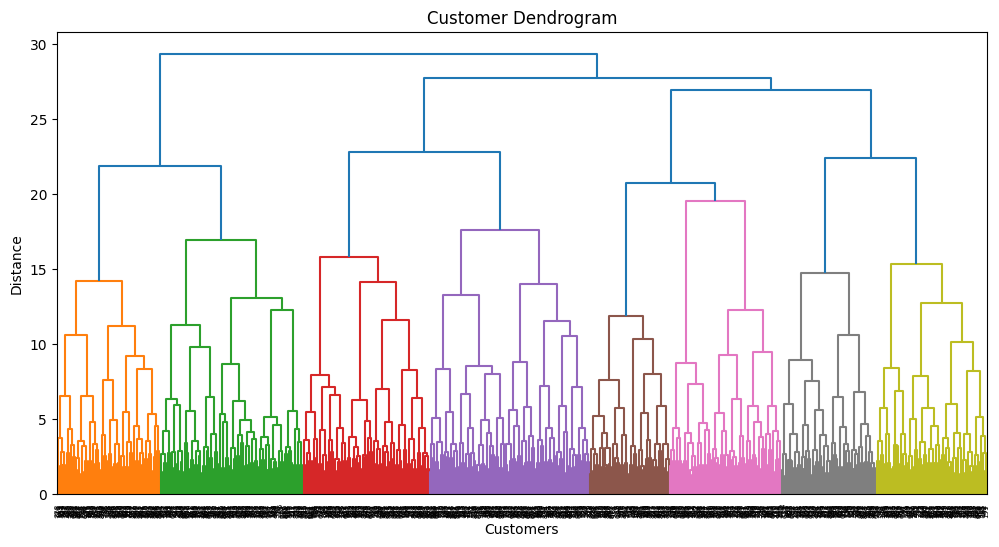

In [66]:
linkage_matrix = linkage(cust_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


In [67]:
cust_data['Agglo_Segment'] = y_hc

In [68]:
customer_profile_agglo = cust_data.groupby('Agglo_Segment').agg({
    'spending_score': 'mean',
    'age': 'mean',
    'income': 'mean',
    'spending_score': 'mean',
    'membership_years': 'mean',
    'purchase_frequency': 'mean',
    'last_purchase_amount': 'mean'
})

In [69]:
customer_profile_agglo

,spending_score,age,income,membership_years,purchase_frequency,last_purchase_amount
Agglo_Segment,,,,,,
0,55.363806,45.692164,87057.927239,5.845149,29.149254,466.823507
1,45.280172,41.577586,90167.566810,5.034483,23.646552,521.834634


In [70]:
cust_data['Agglo_Segment'].value_counts()

,count
Agglo_Segment,
0,536
1,464


####Insights
The 2 clusters by hierarchical clustering shows:
- Cluster 0 (536 customers) average age 55, lower spending score, more frequent purchases. .
- Cluster 1	(464 customers)	higher spending score, higher last purchase, average age 45.

##Key Insights

- Customers with high tenure & frequency are loyal — prioritize with retention offers and rewards.
- Newer high-income customers could become loyal high spenders — nurture with personalization.
- Some customers purchase frequently but spend less — introduce bundled offers or loyalty programs.



##Conclusion
This customer segmentation successfully used both K-Means and Hierarchical Clustering to uncover meaningful behavioral segments. The K-Means model, with 4 well-differentiated clusters, offers a detailed foundation for personalized marketing.

##Recommendations
- For customer retention, focus on VIP rewards and long-term benefit schemes.
- Target with premium options, limited-time deals.
- Use profiles for personalized emails, product recommendations, and dynamic pricing strategies.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##RFM Analysis
Recency, Frequency and Monetary Analysis

- Recency: Customers made a purchase recently. In this data, we can assume 'membership years'.
- Frequency: Customers who often make purchases. In this data, we have 'purchase frequency' from which we can map the frequency.
- Monetary: Customers spend on their purchases. In this data, we can take the 'last purchase amount' multiplied by 'purchase frequency'.

In [71]:
cust_data1 = pd.read_csv('/content/customer_segmentation_data.csv')

In [72]:
cust_data1.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [73]:
# Year for recency calculation
Year = 2024

# Recency
cust_data1['Recency'] = Year - cust_data1['membership_years']

# Frequency
cust_data1['Frequency'] = cust_data1['purchase_frequency']

# Monetary
cust_data1['Monetary'] = cust_data1['last_purchase_amount']*cust_data1['purchase_frequency']

rfm_data = cust_data1[['id','Recency','Frequency','Monetary']]

In [74]:
rfm_data.head(5)

,id,Recency,Frequency,Monetary
0,1,2021,24,2724.72
1,2,2022,42,1761.06
2,3,2022,28,11882.08
3,4,2015,5,4959.65
4,5,2021,25,8677.00


In [75]:
# Quantiles
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])

In [76]:
# Score based on quantiles
def R_Score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def F_M_Score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

rfm_data['R'] = rfm_data['Recency'].apply(R_Score, args=('Recency', quantiles,))
rfm_data['F'] = rfm_data['Frequency'].apply(F_M_Score, args=('Frequency', quantiles,))
rfm_data['M'] = rfm_data['Monetary'].apply(F_M_Score, args=('Monetary', quantiles,))

In [77]:
# RFM Segement
rfm_data['RFM_Segment'] = rfm_data['R'].astype(str)+rfm_data['F'].astype(str)+rfm_data['M'].astype(str)

In [78]:
# Add the RFM Score
rfm_data['RFM_Segment'] = rfm_data[['R','F','M']].sum(axis=1)

In [79]:
rfm_data.head(5)

,id,Recency,Frequency,Monetary,R,F,M,RFM_Segment
0,1,2021,24,2724.72,3,3,4,10
1,2,2022,42,1761.06,4,1,4,9
2,3,2022,28,11882.08,4,2,2,8
3,4,2015,5,4959.65,1,4,3,8
4,5,2021,25,8677.00,3,3,3,9


In [80]:
rfm_data['RFM_Segment'].unique()

array([10,  9,  8,  6,  7, 11,  3,  5, 12,  4])

In [81]:
# Segmentation
segment_labels = ['Low_Value', 'Mid_Value', 'High_Value']

def assign_segment(x):
    if x < 5:
        return 'High_Value'
    elif x < 9:
        return 'Mid_Value'
    else:
        return 'Low_Value'

rfm_data['Segment_Label'] = rfm_data['RFM_Segment'].apply(assign_segment)
rfm_data.head(5)

,id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Segment_Label
0,1,2021,24,2724.72,3,3,4,10,Low_Value
1,2,2022,42,1761.06,4,1,4,9,Low_Value
2,3,2022,28,11882.08,4,2,2,8,Mid_Value
3,4,2015,5,4959.65,1,4,3,8,Mid_Value
4,5,2021,25,8677.00,3,3,3,9,Low_Value


In [82]:
rfm_data['Segment_Label'].value_counts()

,count
Segment_Label,
Mid_Value,546
Low_Value,329
High_Value,125


In [83]:
# To plot the graph of the segment
segment_count = rfm_data['Segment_Label'].value_counts().reset_index()
segment_count.columns = ['RFM Segment', 'Count']
segment_count

,RFM Segment,Count
0,Mid_Value,546
1,Low_Value,329
2,High_Value,125


In [84]:
fig = px.bar(segment_count,
             x = 'RFM Segment',
             y = 'Count',
             color = 'RFM Segment',
             title='Customer Segments',
             color_discrete_map={'High_Value':'green', 'Mid_Value':'skyblue', 'Low_Value':'red'}
            )
fig.show()

- High value i.e. customers who are frequent and recent are less as compared to those of mid and low value.
- From the above graph, we can say that more customers fall in the mid value, i.e., they have a good RFM score but might not be frequent or recent.
- Low value i.e. customers who need attention, are more.

In [85]:
# Further creating more segments to analyze in depth
rfm_data['RFM_Customer_Segments'] = ' '

rfm_data.loc[rfm_data['RFM_Segment'] == 3, 'RFM_Customer_Segments'] = 'VIP/Potential Customers'
rfm_data.loc[(rfm_data['RFM_Segment'] >= 4) & (rfm_data['RFM_Segment'] <= 6), 'RFM_Customer_Segments'] = 'Loyal Customers'
rfm_data.loc[(rfm_data['RFM_Segment'] >= 7) & (rfm_data['RFM_Segment'] <= 8), 'RFM_Customer_Segments'] = 'Need Attention'
rfm_data.loc[(rfm_data['RFM_Segment'] >= 9) & (rfm_data['RFM_Segment'] <= 10), 'RFM_Customer_Segments'] = 'At Risk'
rfm_data.loc[(rfm_data['RFM_Segment'] >= 11) & (rfm_data['RFM_Segment'] <= 12), 'RFM_Customer_Segments'] = 'Lost Customers'


In [86]:
# To plot the graph
segment_count1 = rfm_data['RFM_Customer_Segments'].value_counts().reset_index()
segment_count1.columns = ['RFM Segment', 'Count']
segment_count1

,RFM Segment,Count
0,Loyal Customers,326
1,Need Attention,293
2,At Risk,232
3,Lost Customers,97
4,VIP/Potential Customers,52


In [87]:
fig = px.bar(segment_count1,
             x = 'RFM Segment',
             y = 'Count',
             color = 'RFM Segment',
             title='Customer Segments',
            )
fig.show()

In [88]:
# To plot a treemap
segment_product_counts = rfm_data.groupby(['Segment_Label','RFM_Customer_Segments']).size().reset_index(name = 'Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)
segment_product_counts

,Segment_Label,RFM_Customer_Segments,Count
5,Mid_Value,Need Attention,293
4,Mid_Value,Loyal Customers,253
2,Low_Value,At Risk,232
3,Low_Value,Lost Customers,97
0,High_Value,Loyal Customers,73
1,High_Value,VIP/Potential Customers,52


In [89]:
fig = px.treemap(segment_product_counts,
                 path=['Segment_Label','RFM_Customer_Segments'], values='Count',
                 color = 'Segment_Label',
                 color_discrete_map={'High_Value':'green', 'Mid_Value':'skyblue', 'Low_Value':'red'},
                 title='RFM Customer Segments by Value',
                )
fig.show()

##Insights
- High Value: Loyal and VIP Customers should be prioritized with retention and loyalty programs
- Mid Value: Need Attention or moderately engaged, ideal for reactivation and nurturing strategies
- Low Value: At Risk and Lost Customers focus on cost-effective recovery or minimal targeting

##Conclusions
- The customer base is highly diverse, with significant differences in income, engagement, and recency.
- A large proportion of customers are moderately active but at risk of churn, as indicated by RFM and clustering.
- High-value customers, though fewer in number, contribute disproportionately to spending — essential to retain.
- Clustering helped identify actionable customer segments beyond simple demographics.



##Recommendations
- Retention & Loyalty focus on  VIPs and loyal customers for loyalty programs, rewards, and personalized offers. Introduce early access, referral bonuses, or tiered benefits to deepen engagement.
- Target “Need Attention” and “At Risk” customers with re-engagement emails, Limited-time discounts, and Feedback surveys to understand disengagement.